# PRELIMINARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading the dataset
import ssl

# Ignore SSL certificate errors
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://raw.githubusercontent.com/jinzalabim/DATA103-Library/refs/heads/main/healthcare-dataset-stroke-data.csv')
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


# DATA PREPROCESSING

## Handle Missing Values

In [ ]:
# Fill missing values for numerical columns with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['avg_glucose_level'] = df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean())

## **Encoding the Variables**

For smoking status, the data cleaning can get a bit tricky. There are 5 attributes: `formerly smoked`, `never smoked`, `smokes` or `Unknown`.

Since formerly smoked and smokes can be group together, we can combine transform their values to become `smoked`. Now we have `smoked`, `never smoked`, and `Unknown`.

Technically the value `Unknown` is equivalent to null so we want `unknown` to be changed into the most common value between `smoked` and `never smoked`  so replace unknown frequent value (**mode**). Then, `LabelEncoder` is used to convert categorical values ('`smoked`', '`never` smoked') into numerical values (1 and 0, respectively).


In [ ]:
# Replace 'formerly smoked' and 'smokes' with 'smoked'
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked', 'smokes'], 'smoked')

# Calculate the mode of the remaining values ('smoked' and 'never smoked')
mode_smoking_status = df['smoking_status'].mode()[0]

# Replace 'Unknown' with the mode
df['smoking_status'] = df['smoking_status'].replace('Unknown', mode_smoking_status)

# Convert 'smoking_status' to numerical values using LabelEncoder
label_encoder_smoke = LabelEncoder()
df['smoking_status'] = label_encoder_smoke.fit_transform(df['smoking_status'])  # 1: smoked, 0: never smoked

We have an unconventional way of cleaning `work_type`. This is because of the attributes of the data. Since `Self-employed`, `Private`, and `Govt_jov` are basically just different categories of working people, we can just combine them to become the value `Employed.` For easier purposes of naming, let's also turn `Never_worked` to `Unemployed`. We also turn `children` to `Children`.

After that, we encode them as Unemployed: 0, Employed: 1, and Children: 2.

In [ ]:
# Clean the 'work_type' column and Replace specific categories in 'work_type'
df['work_type'] = df['work_type'].replace(['Self-employed', 'Private', 'Govt_job'], 'Employed')
df['work_type'] = df['work_type'].replace('Never_worked', 'Unemployed')
df['work_type'] = df['work_type'].replace('children', 'Children')

# Encode the cleaned 'work_type' values
work_type_mapping = {
    'Unemployed': 0,
    'Employed': 1,
    'Children': 2
}
df['work_type'] = df['work_type'].map(work_type_mapping)


In [ ]:
# Convert 'gender' to numerical values using LabelEncoder
label_encoder_gender = LabelEncoder()
df['gender'] = label_encoder_gender.fit_transform(df['gender'])

In [ ]:
# Convert marriage statuse to numerical values
label_encoder_married = LabelEncoder()
df['ever_married'] = label_encoder_married.fit_transform(df['ever_married']) #Married (Yes):1, Never Married (No):0

In [ ]:
# Convert 'Residence_type' to numerical since it just has two options.
df['Residence_type'] = LabelEncoder().fit_transform(df['Residence_type']) #Urban: 1, Rural: 0

In [ ]:
print(df.head())
df.isna().sum()

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          1   
1  51676       0  61.0             0              0             1          1   
2  31112       1  80.0             0              1             1          1   
3  60182       0  49.0             0              0             1          1   
4   1665       0  79.0             1              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               0       1  
2               0             105.92  32.500000               0       1  
3               1             171.23  34.400000               1       1  
4               0             174.12  24.000000               0       1  


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
# Identify categorical and numerical columns
categorical_cols = ['ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_cols = ['age', 'gender', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

Lists of categorical and numerical columns are created to help define the preprocessing steps. `ColumnTransformer` is used to preprocess the data: numerical columns are scaled using `StandardScaler`, and categorical columns are one-hot encoded, dropping the first category to avoid multicollinearity.

In [ ]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)  # One-hot encode categorical features
    ])

## Split the Data

X contains the feature columns (everything except id and stroke), and y is the target variable (stroke) and we split the data into 80/20 ratio using `train_test_split`.


In [ ]:
# Define features and target variable
X = df.drop(columns=['id', 'stroke'])  # Drop id and target column
y = df['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A `Pipeline` is created that applies the preprocessing steps defined in preprocessor. The fit method is called to fit the pipeline on the training data. The data is then transformed using the pipeline, which scales and encodes the features.

In [ ]:
# Create a preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'gender',
                                                   'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])]))])

In [ ]:
# Transform the entire dataset
X_processed = pipeline.transform(X)

# Split the preprocessed data into training and testing sets
X_train_processed, X_test_processed, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# **GRADIENT BOOSTING (from scratch)**

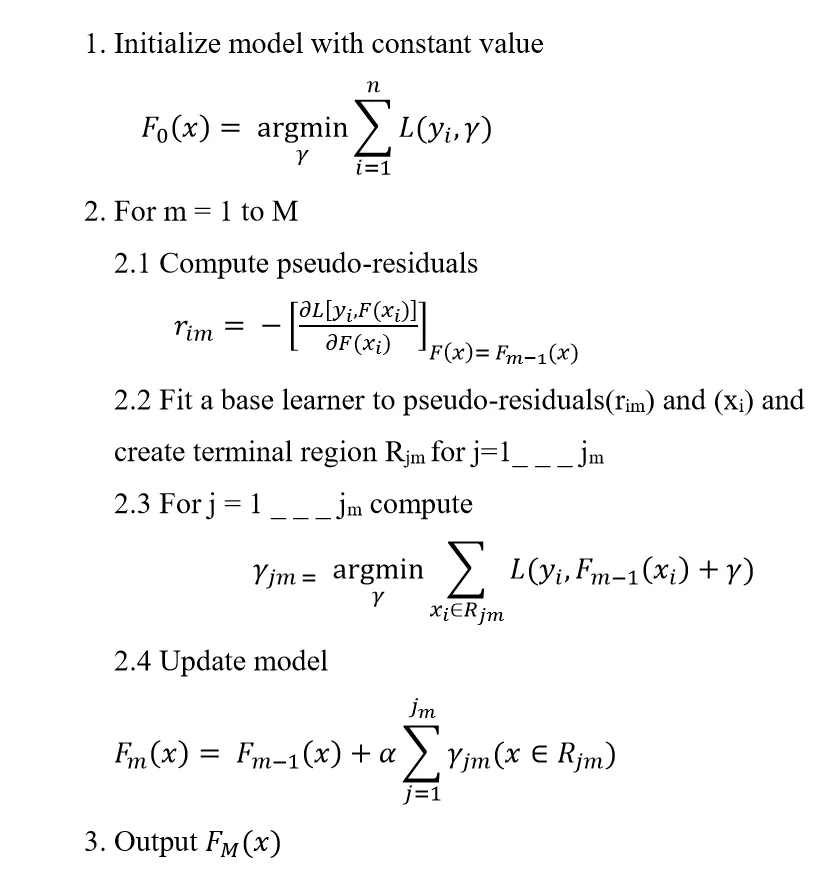


**Reference:**
Xu, X. (2022, December). Research on the stock price forecasting of netflix based on linear regression, decision tree, and gradient boosting models. In 2022 2nd International Conference on Business Administration and Data Science (BADS 2022) (pp. 1232-1242). Atlantis Press.






From here we can see the pseudocode for Gradient Boosting:



```
1. Initialize the model with a base prediction (usually the mean of the target variable, y).
2. For each iteration t = 1 to T (where T is the number of trees):
    a. Compute the residuals: residuals = y - F(x)  (the difference between the actual values and the current model's predictions)
    b. Fit a new weak learner (usually a decision tree) to predict the residuals.
    c. Update the model's predictions: F(x) = F(x) + learning_rate * h_t(x), where h_t(x) is the prediction of the t-th tree.
3. The final model is the sum of the base prediction and the predictions from all the trees.


```


The process begins by initializing the model with a simple base prediction, which is typically the mean of the target variable
𝑦, as no model has been trained initially. Then, for each iteration 𝑡 (from 1 to 𝑇, where 𝑇 is the number of trees), a new weak learner is trained on the residuals or errors between the actual target values 𝑦 and the current model’s predictions 𝐹(𝑥). These residuals represent the mistakes made by the model at that stage, and the goal of the new tree is to predict these errors so that they can be corrected.

Once the residuals are computed, a decision tree (or another weak learner) is trained to predict them. After this, the model’s predictions are updated by adding the new tree’s predictions, scaled by a factor known as the learning rate
𝜂, which controls how much each tree contributes to the final model. The final model is the sum of the base prediction and the predictions from all the trees.

At each iteration, the residuals
𝑟𝑡(𝑥) are calculated as the difference between the true target values 𝑦 and the model’s current predictions 𝐹𝑡−1(𝑥)​. This ensures that each tree focuses on correcting the errors from the previous trees. The model’s predictions are updated by adding the scaled predictions from the
𝑡
t-th tree
ℎ
𝑡
(
𝑥
) to the previous predictions.



## **How does it work?**

A function gradient_boosting is defined to implement the gradient boosting algorithm. It initializes predictions to the mean of y. The function iterates over a predefined number of trees. For each iteration, it computes the residuals (differences between the true and predicted values), fits a decision tree to the residuals, and updates the predictions. The predict function uses the final predictions to predict the target values for new data (X_new). The function returns the predict function for later use.

The gradient boosting model is trained using the gradient_boosting function and then predictions on the test set are made using the trained model


### **Model Training**

In [ ]:
def gradient_boosting(X, y, num_trees=100, learning_rate=0.1, max_depth=3):
    """
    Implements Gradient Boosting from scratch.

    Args:
        X: Training features (2D array).
        y: Training target values (1D array).
        num_trees: Number of trees to build.
        learning_rate: Controls the contribution of each tree.
        max_depth: Maximum depth of each tree.

    Returns:
        A function that predicts target values for new data.
    """

    # Initialize prediction with mean of target values
    predictions = np.mean(y)

    # Iterate over trees
    for i in range(num_trees):
        # Calculate residuals (errors)
        residuals = y - predictions

        # Train a weak learner (decision tree) on the residuals
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X, residuals)

        # Update predictions with the weighted output of the new tree
        predictions += learning_rate * tree.predict(X)

    # Return a function to predict for new data
    def predict(X_new):
        predictions_new = np.mean(y)
        for i in range(num_trees):
            predictions_new += learning_rate * tree.predict(X_new)
        return predictions_new

    return predict

The gradient_boosting function takes in the training data X and y, along with hyperparameters num_trees, learning_rate, and max_depth. It initializes the predictions with the mean of the target values. Then, it iteratively builds num_trees decision trees, each trained on the residuals (errors) of the previous tree. The predictions are updated by adding the weighted output of each new tree. Finally, it returns a function that can be used to predict target values for new data.

In [ ]:
# Train the gradient boosting model
predict_fn = gradient_boosting(X_train, y_train, num_trees=100, learning_rate=0.1, max_depth=3)

# Make predictions on the test set
y_pred = predict_fn(X_test)

# Convert predictions to binary (for classification)
y_pred_binary = (y_pred > 0.5).astype(int)

### Model Evaluation

In [ ]:
# Evaluate the model on the training set
y_train_pred = predict_fn(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_mse = mean_squared_error(y_train, y_train_pred)

# Evaluate the model on the test set (already done)
test_accuracy = accuracy_score(y_test, y_pred_binary)
test_mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Test Mean Squared Error: {test_mse:.2f}")

# Check for overfitting
if train_accuracy > test_accuracy:
    print("Warning: The model might be overfitting.")
else:
    print("The model's performance on training and test sets is comparable.")


Training Accuracy: 0.95
Test Accuracy: 0.94
Training Mean Squared Error: 0.05
Test Mean Squared Error: 0.06


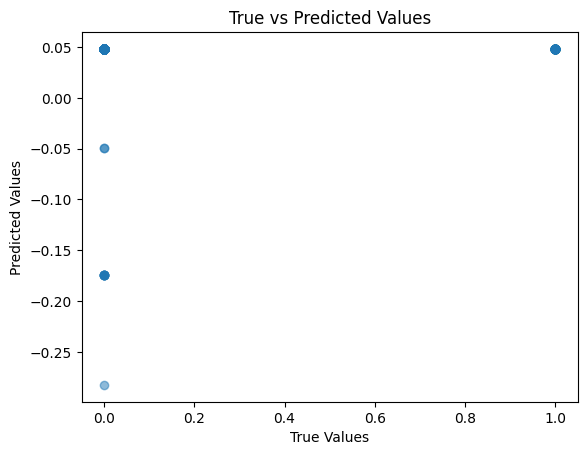

In [ ]:
# Visualize the predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

## **Comparing with Baseline Model**

In [ ]:
# Compare with a baseline model (Logistic Regression)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model (Logistic Regression) Accuracy: {accuracy_baseline:.2f}")

# Check for overfitting
y_pred_train = predict_fn(X_train)
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
print(f"Training Accuracy: {accuracy_train:.2f}")

if accuracy_train > accuracy_baseline:
    print("Overfitting detected!")
else:
    print("No overfitting detected.")

Baseline Model (Logistic Regression) Accuracy: 0.94
Training Accuracy: 0.95
Overfitting detected!


Since in the baseline model and our gradient boosting method from scratch says that it's overfitted, we can implement early stopping in our gradient boost function.

We can do this by creating a copy of the original training data (X_train_copy and y_train_copy) to avoid modifying the original data.

After that, we will define a new gradient_boosting_with_early_stopping function that takes additional patience and min_delta parameters. Then, we modify the training loop to include early stopping logic.


# **Modified gradient_boosting Function with Early Stopping**


In [ ]:
# Create a copy of the original training data (to avoid modifying it)
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [ ]:
# Split the copied data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_copy, y_train_copy, test_size=0.2, random_state=42
)

After creating copies of the training data, a modified `gradient_boosting_with_early_stopping` function is then defined, introducing `X_val` and `y_val` for validation, along with patience and `min_delta` to monitor performance and control early stopping. Initial predictions are set to the mean of the target variable, while `best_loss` tracks the lowest validation loss and `patience_counter` counts iterations without improvement. A nested `predict_fn` function is defined to generate predictions on new data using all trained trees up to the current iteration. The training loop iterates through the specified number of trees, calculating residuals, fitting a new tree to these residuals, and updating predictions accordingly. After each iteration, the validation loss is computed, and if it improves beyond the `min_delta`, `best_loss` is updated, and the patience counter is reset. If no improvement is observed for the specified patience, the training stops early to prevent overfitting, returning the `predict_fn` function for predictions.

In [ ]:
def gradient_boosting_with_early_stopping(X_train, y_train, X_val, y_val, num_trees=100, learning_rate=0.1, max_depth=3, patience=10, min_delta=1e-4):
    """
    Implements Gradient Boosting from scratch with Early Stopping.

    Args:
        X_train: Training features (2D array).
        y_train: Training target values (1D array).
        X_val: Validation features (2D array).
        y_val: Validation target values (1D array).
        num_trees: Number of trees to build.
        learning_rate: Controls the contribution of each tree.
        max_depth: Maximum depth of each tree.
        patience: Number of iterations to wait for improvement in validation loss.
        min_delta: Minimum change in validation loss to qualify as an improvement.

    Returns:
        A function that predicts target values for new data.
    """

    # Initialize prediction with mean of target values
    predictions = np.full(y_train.shape, np.mean(y_train))
    best_loss = float('inf')
    patience_counter = 0

    # Initialize a list to store the sequence of trees
    trees = []

    # Iterate over trees
    for i in range(num_trees):
        # Calculate residuals (errors)
        residuals = y_train - predictions

        # Train a weak learner (decision tree) on the residuals
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X_train, residuals)

        # Store the tree
        trees.append(tree)

        # Update predictions with the weighted output of the new tree
        predictions += learning_rate * tree.predict(X_train)

        # Compute validation loss
        val_predictions = np.full(y_val.shape, np.mean(y_train))
        for t in trees:
            val_predictions += learning_rate * t.predict(X_val)
        val_loss = mean_squared_error(y_val, val_predictions)

        # Check for improvement
        if val_loss < best_loss - min_delta:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        # Stop training if patience exceeded
        if patience_counter >= patience:
            print(f"Early stopping at iteration {i}")
            break

    # Define a prediction function for new data
    def predict(X_new):
        predictions_new = np.full(X_new.shape[0], np.mean(y_train))
        for t in trees:
            predictions_new += learning_rate * t.predict(X_new)
        return predictions_new

    return predict


Within the main training loop, residuals are calculated as the difference between actual and predicted values, and a decision tree regressor is trained on these residuals. The model's predictions are updated incrementally with the tree’s output scaled by the learning rate. Training and validation losses are calculated at each iteration. If validation loss improves beyond `min_delta`, `best_loss` is updated and the patience counter is reset; otherwise, the counter increments.

If the patience counter reaches the specified threshold, training halts, and the model stops adding trees to prevent overfitting. Finally, the function returns the prediction function with all trained trees. The model is trained with the defined parameters and early stopping logic to optimize generalization and avoid overfitting.

In [ ]:
# Train the model with early stopping
predict_fn_with_early_stopping = gradient_boosting_with_early_stopping(X_train_copy, y_train_copy, X_val, y_val, num_trees=100, learning_rate=0.1, max_depth=3, patience=10, min_delta=1e-4)

In [ ]:
# Evaluate on the test set
test_predictions = predict_fn_with_early_stopping(X_test)
test_predictions_binary = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, test_predictions_binary)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9393


In [ ]:
# Evaluate on the validation set
val_predictions = predict_fn_with_early_stopping(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {val_mse:.4f}")

# Evaluate on the test set
test_predictions = predict_fn_with_early_stopping(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {test_mse:.4f}")

Validation MSE: 0.0329
Test MSE: 0.0512


The original gradient boosting model shows high training accuracy (0.95) and test accuracy (0.94), with a slight difference in MSE (0.05 for training and 0.06 for testing), indicating potential overfitting. In comparison, the model with early stopping has a lower validation MSE (0.0329) and a slightly better test MSE (0.0511) than the original model, suggesting improved generalization. While both models achieve similar accuracy, the early stopping model performs a bit better in terms of MSE, indicating that early stopping helped reduce overfitting and improved performance on unseen data.

## **How does the gradient boosting algorithm differ from random forests in terms of making the final forecast and in terms of overall logic?**

### **Model Building Logic:**

In Gradient Boosting, trees are built sequentially, with each new tree trained to correct the errors made by the previous ones (boosting). This iterative process allows gradient boosting to focus on the mistakes from prior trees, gradually improving the model's performance. In contrast, Random Forests build trees independently and in parallel. Each tree is trained on a random subset of the data (bagging) and uses a random subset of features for each split. The final prediction in Random Forests is made by averaging the outputs in regression tasks or by voting in classification tasks.

### **Final Forecast:**

In Gradient Boosting, the final prediction is the cumulative sum of all trees' predictions, weighted by the learning rate. This process consists of a series of corrections to the predictions based on the errors (residuals) from previous iterations. On the other hand, Random Forests calculate the final forecast by averaging the predictions of all individual trees in regression or by taking a majority vote in classification tasks.

### **Bias and Variance:**
Gradient Boosting is more prone to overfitting, especially when using a large number of trees or small learning rates, as it fits each tree based on the residuals (errors) of previous models. This can lead to a model that is overly complex and highly sensitive to the training data. In contrast, Random Forests are less prone to overfitting due to the use of bagging, where trees are trained on different subsets of the data. This ensures diversity among the trees, which reduces variance and generally improves the model's ability to generalize to new, unseen data.



| Aspect                  | Gradient Boosting                          | Random Forest Classifier (RFC)               |
|-------------------------|--------------------------------------------|----------------------------------------------|
| **Model Building Logic** | Trees are built sequentially; each new tree corrects errors made by the previous ones (boosting). | Trees are built independently and in parallel; each tree is trained on a random subset of data and features (bagging). |
| **Final Forecast**       | The final prediction is the cumulative sum of all tree predictions, weighted by the learning rate. | The final prediction is the average (regression) or majority vote (classification) from all trees. |
| **Bias**                 | More prone to overfitting due to sequential correction of errors. | Less prone to overfitting due to the averaging of multiple independent trees. |
| **Variance**             | Prone to higher variance, especially with too many trees or small learning rates. | Lower variance due to the use of bagging and random feature selection, which ensures diversity among trees. |
| **Training Process**     | Sequential; each tree builds on the previous one. | Parallel; all trees are trained independently. |
| **Handling Errors**      | Focuses on residuals/errors from previous trees, correcting them iteratively. | Each tree is trained independently, with no focus on previous trees' errors. |
| **Performance on Small Datasets** | Can be prone to overfitting on small datasets due to the sequential nature. | Performs well on small datasets due to the averaging process and reduced variance. |
| **Computation Time**     | Slower to train due to the sequential nature of tree building. | Faster to train as trees are built independently in parallel. |



To conclude, Gradient Boosting and Random Forests differ in how they make the final forecast and their overall logic. In Gradient Boosting, models are built sequentially, with each new model trying to correct the errors of the previous one. The final forecast is made by combining all the models in a weighted way. The algorithm focuses on improving accuracy by addressing mistakes from earlier iterations. On the other hand, Random Forests build many decision trees independently, using random subsets of data and features. The final forecast is made by averaging the results of all the trees or taking a majority vote. The logic behind Random Forests is to combine many individual models to improve overall accuracy. This relies on the "wisdom of crowds" approach.